# Visualizing Distributions 
## Measures of Central Tendency and Dispersion
##### Mean, Median, Mode , and Degrees of Freedom
We previously introduced the mean as $\mu$ and and variance as $\sigma^2$, which measure the center of location and the variability of a probability distribution. These are constant population parameters and are in no way affected or influenced by the observations of a random sample. We shall, however, define some important statistics that describe corresponding measures of a random sample. The most commonly used statistics for measuring the center of a set of data, arranged in order of magnitude,
are the mean, median, and mode. Although the first two of these statistics were defined earlier, we repeat the definitions here. Let $X_1, X_2,...,X_n$ represent $n$ random variables. For a given dataset, useful descriptive statistics of central tendency include mean, median, and mode, which we built as functions in a previous chapter. 
- The **Mean** gives the expected value - often denoted $E(X)$ or $\bar{X}$- from a series, $X$, by summing all of the observations and dividing by the number of them. The series may be a sample or may include the full population of interest, which would cause the value to be $\mu$. 
    - If $\mu$ is unknown(which is more common), and we have only a _sample_ of data drawn randomly from a population, we use $\bar{X}$ as an _estimator_ of $\mu$. One must keep in mind that each sample mean $\bar{X_i}$ drawn from the same population is likely to vary; consequently, some degree of uncertainty is involved with $\bar{X}$
    <h3 align="center">
    <font size="4">
         $\bar{X} = \frac{1}{n}\sum_{i=1}^nX_i$
    </font>
    </h3> 
    -Note that the statistic $\bar{X}$ assumes the value $\bar{x} = \frac{1}{n}\sum_{i=1}^nx_i$ when $X_1$ assumes the value $x_1$, $X_2$ assumes the value $x_2$, and so forth. The term *sample mean* is applied to both the statistic $\bar{X}$ and its computed value $\bar{x}$. 
    
    
    
As with all statistical functions, we can translate the equation into operations in a function. Throughout this lesson, we will build statistical functions to demonstrate their significance. To begin, let us build a list, _**X**_, of 100 random integers whose values are between 0 and 100:

In [1]:
import random

# use generato function to define x as an array 
X = [random.randint(0,100) for i in range(100)]
print(X)

[35, 85, 12, 25, 64, 64, 9, 73, 9, 63, 94, 0, 54, 29, 32, 19, 6, 11, 80, 23, 39, 59, 23, 1, 67, 39, 69, 12, 77, 69, 34, 90, 33, 55, 45, 73, 41, 81, 85, 31, 68, 78, 56, 28, 55, 48, 31, 34, 37, 52, 83, 33, 60, 28, 24, 9, 11, 97, 33, 92, 48, 3, 54, 42, 91, 6, 13, 68, 14, 30, 6, 36, 17, 18, 54, 85, 71, 74, 5, 47, 79, 99, 89, 17, 12, 85, 68, 71, 50, 29, 2, 7, 37, 47, 65, 19, 6, 96, 10, 21]


To calculate the mean value, we will also need to calculate the sum of a list of numbers. Thus, we will create two functions, *total* and *mean*, and we will use the *total* function in the *mean* function.  

In [2]:
def total(lst):
    total = 0
    for val in lst:
        total += val
    return total

def mean(lst):
    n = len(lst)
    mean_ = total(lst) / n
    return mean_

In [3]:
mean(X)

44.58

We should not be surprised that the mean of our list _**X**_ is close to the value 50.

- The **Median** is less sensitive to outliers than mean; it is the value in the middle of the dataset. For a series of odd length defined by a range [i, n] starting with index $i=0$, the median is $\frac{n}{2}$. For a series that is of even length but otherwise the same, the median is the mean value of the two values that comprise middle of the list. The indices of these numbers are equal to: $\frac{n + 1}{2}$ and $\frac{n - 1}{2}$. If $x_\frac{n + 1}{2}+x_\frac{n-1}{2}=k$,  then the median is defined as $\frac{k}{2}$.





In [4]:
def median(lst):
    n = len(lst)
    # sort the values and take the middle value if the 
    #    list is of odd length
    # or the mean of the two middle values if the list 
    #    of even length 
    lst = sorted(lst)
    if n % 2 != 0:
        # list length is odd
        middle_index = int((n - 1) / 2)
        median_ = lst[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        print(upper_middle_index, lower_middle_index)
        median_ = mean(
            lst[lower_middle_index:upper_middle_index + 1])
    return median_


In [5]:
median(X)

50 49


40.0

- The **Mode** is the value which occurs the most in the dataset, in a distribution it is the top of the curve 
     - _Consider that in 2020, the real **Median** personal income in the United States was \$35,805, and the real **Mean** personal income was \$53,996. Why might these measures be so different?_
     

In [6]:
def mode(list_obj):
    max_count = 0
    counter_dict = {}
    for value in list_obj:
        counter_dict[value] = 0
    for value in list_obj:
        counter_dict[value] += 1
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

In [7]:
mode(X)

[85, 6]

### Add Discussion before plotting. Explain the code as you develop it.

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

income_data = pd.read_excel("hinc06.xlsx", header=[6])
income_data

,Unnamed: 0,Number,Mean income (dollars),Standard error (dollars),Number.1,Mean income (dollars).1,Standard error (dollars).1,Number.2,Mean income (dollars).2,Standard error (dollars).2,...,Standard error (dollars).5,Number.6,Mean income (dollars).6,Standard error (dollars).6,Number.7,Mean income (dollars).7,Standard error (dollars).7,Number.8,Mean income (dollars).8,Standard error (dollars).8
0,....Total,129931,97026,634,103606,100059,717,101582,100005,720,...,1190,7539,131861,2562,6987,131065,2490,18349,75193,854
1,"Under $5,000",4211,977,58,2892,933,75,2813,916,76,...,95,190,873,218,176,738,220,682,905,146
2,"$5,000 to $9,999",2926,7875,49,1919,7893,59,1859,7897,61,...,84,152,7954,193,139,7979,202,455,7905,114
3,"$10,000 to $14,999",5109,12547,33,3567,12552,39,3474,12552,40,...,65,220,12579,156,212,12634,154,816,12381,73
4,"$15,000 to $19,999",5667,17448,35,4348,17472,40,4262,17479,40,...,71,228,17458,163,206,17568,160,815,17275,78
5,"$20,000 to $24,999",5609,22313,37,4264,22330,41,4189,22333,42,...,83,230,22309,162,219,22255,165,979,22004,74
6,"$25,000 to $29,999",5186,27228,30,4082,27222,36,3989,27226,37,...,83,151,27380,196,143,27340,206,851,27074,58
7,"$30,000 to $34,999",5329,32042,36,4124,32077,42,4048,32075,43,...,96,218,31912,148,198,31946,160,1033,31985,68
8,"$35,000 to $39,999",5285,37142,36,4106,37182,43,4032,37190,43,...,81,228,37293,158,218,37284,164,918,36985,72
9,"$40,000 to $44,999",5100,42084,37,4050,42075,42,3995,42078,43,...,89,182,42261,141,172,42263,145,943,41864,76


In [9]:
income_levels = list(range(0, 200, 5))
income_levels.append(200)
income_levels.append(250)

In [10]:
income = income_data["Number"][1:]

In [11]:
weighted_income = income*income_levels

### Bins of 25k seem appropriate, so I created a cumulative sum of population in each bracket, then differenced the cumulative values using the larger bins.

In [12]:
income_df = pd.DataFrame()
income_df["Income Level"] = income_levels
income_df["Income"] = income
income_df["Under Income Level"] = income_df["Income"].cumsum()
income_25k_bin = income_df.loc[::5].fillna(0)
income_25k_bin

,Income Level,Income,Under Income Level
0,0,0.0,0.0
5,25,5609.0,23522.0
10,50,4684.0,49106.0
15,75,3971.0,70523.0
20,100,2677.0,86330.0
25,125,2141.0,98307.0
30,150,1371.0,106246.0
35,175,1109.0,112396.0
40,200,695.0,116612.0


In [13]:
income_25k_bin["Income"] = income_25k_bin["Under Income Level"].diff()
income_25k_bin = income_25k_bin.T
income_25k_bin["250k+"] = income_df.iloc[-1]
income_25k_bin = income_25k_bin.T

income_25k_bin.rename(columns = {"Income":"# in Bracket"}, inplace = True)
income_25k_bin["% in Bracket"] = income_25k_bin["# in Bracket"].div(income_25k_bin["# in Bracket"].sum()).mul(100)
income_25k_bin

,Income Level,# in Bracket,Under Income Level,% in Bracket
0,0.0,NaN,0.0,NaN
5,25.0,23522.0,23522.0,19.320553
10,50.0,25584.0,49106.0,21.014243
15,75.0,21417.0,70523.0,17.591543
20,100.0,15807.0,86330.0,12.983589
25,125.0,11977.0,98307.0,9.837695
30,150.0,7939.0,106246.0,6.520953
35,175.0,6150.0,112396.0,5.051501
40,200.0,4216.0,116612.0,3.462947
250k+,250.0,5134.0,121746.0,4.216976


##### It would be nice if we could identify the percentage of income in each bracket, then plot the overlapping distributions. 

In [14]:
income_data["Mean income (dollars)"][1]/10

97.7

<ipython-input-15-41d42158dfe6>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + "%" for y in ax.get_yticks()])


Text(0.5, 1.0, '(Figure 1): Income Distribution in the United States')

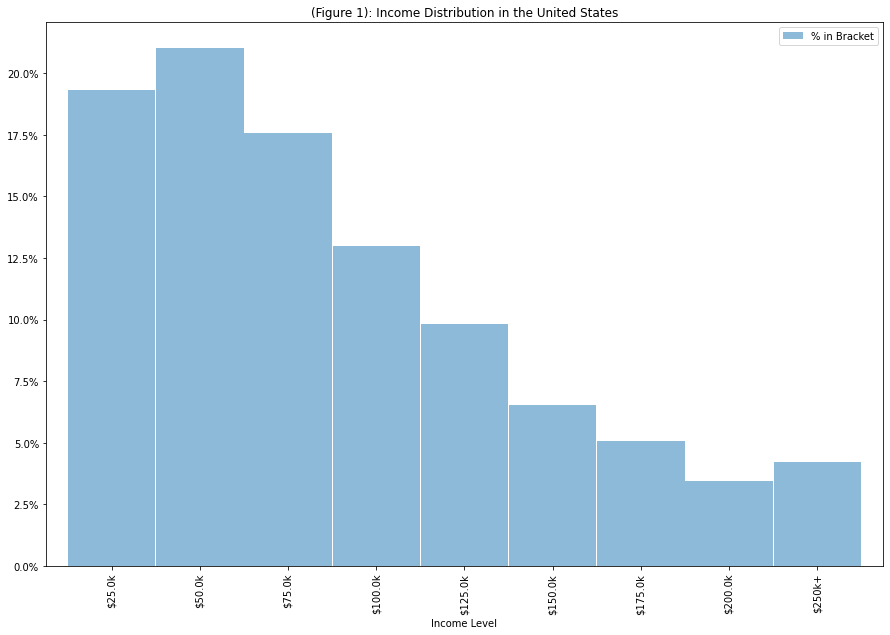

In [15]:
fig, ax = plt.subplots(figsize = (15, 10))
plot_df = income_25k_bin.dropna()
plot_df.plot.bar(x="Income Level", 
                                 y="% in Bracket", 
                                 fill=True, 
                                 alpha=.5, 
                                 width = .99,
                                 ax=ax)

ax.set_yticklabels([str(y) + "%" for y in ax.get_yticks()])
x_ticklabels = ["$" + str(x) +"k" for x in plot_df["Income Level"]]
x_ticklabels[-1] = "$250k+"
ax.set_xticklabels(x_ticklabels)

# Not sure why mean is not appearing after changes and I am unfamiliar with the dataset. Could you check data?
ax.vlines(x=income_data["Mean income (dollars)"][1]*10, ymin=0, ymax=20, color='r', linestyles='--')
#ax.vlines(x=67, ymin=0,ymax=20, color='r', linestyles='--')

ax.set_title("(Figure 1): Income Distribution in the United States")

###### Variance, Standard Deviation, and Standard Error
After knowing where the center of a dataset lies, the next important measure is one that tells us how spread out the data is. Standard error is the only new function and it is simly the standard deviation of a sampling distribution: 

- **Variance** quantifies the amount of variability around the mean of a dataset by adding together the square of the distance of each individual observation of $x$ from its sample mean $\bar{x}$. It is denoted $\sigma^2$ if population-level data (mean $\mu$) is known and $s^2$ if it is a sample from an unfamiliar population: 
<h3 align="center">
    <font size="4">
        $ S^2 = \frac{1}{DoF}\sum_{i=1}^n (X_i - \bar{X})^2$
    </font>
    </h3> 
-**Degrees of Freedom**
- The degree to which $\bar{X}$, and any statistical population parameter estimator produced from a sample, is allowed to vary, is the **Degrees of Freedom** of the sample. This is the number of independent observation that go into the estimate of a parameter (sample size $n$), minus the number of parameters used as intermediate steps in the estimation of the parameter itself. So if we estimate $\bar{x}$ once: 
    <h3 align="center">
    <font size="4">
        $ DoF = n - 1$
    </font>
    </h3>

Our list of 100 values, _**X**_, has 99 degrees of freedom with regard to calculation of basic statistics such variance and standard deviation.


In [16]:
def sample_DoF(lst):
    # find length of list and subtract 1 
    dof = len(lst) - 1
    return dof

In [17]:
sample_DoF(X)

99

In [18]:
def variance(lst, sample = False):
    # save mean value of list
    list_mean = mean(lst)
    # use n to calculate average of sum squared diffs
    n = len(lst)
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in lst:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / DoF
    
    return variance_

In [19]:
variance(X)

804.0835999999998

- **Standard Deviation** is the positive square root of the variance for a set of data. It is used much more often in data analysis than variance, primarily because it has the same units of measurement as the mean. It corrects the squaring of individual observations deviations from the mean done when calculating variance. It is denoted $s$ when working with a sample with an unknown population mean $\mu$. $s$ is an _estimator_ of $\sigma$, which is standard deviation when $\mu$ is known: 
<h3 align="center">
    <font size="4">
        $ s = \sqrt{S^2}$
    </font>
    </h3> 


In [20]:
def SD(lst, sample = False):
    # Standard deviation is the square root of variance
    SD_ = variance(lst, sample) ** (1/2)
    
    return SD_

In [21]:
SD(X)

28.356367891533637

- **Standard Error** describes how likely a given random sample mean $\bar{x_i}$ is to deviate from the population mean $\mu$. It is the standard deviation of the probability distribution for the random variable $\bar{X}$, which represents all possible samples of a single given sample size $n$. As $n$ increases, $\bar{X}$ can be expected to deviate less from $\mu$, so standard error decreases. Because population standard deviation $\sigma$ is rarely given, we again use an _estimator_ for standard error, denoted $s_\bar{x}$. Populational data has no standard error as $\mu$ can only take on a single value. 
<h3 align="center">
    <font size="4">
        $ S_\bar{x} = \frac{S}{\sqrt{n}}$
    </font>
    </h3> 


In [22]:
import numpy as np
def STE(lst):
    n = len(lst)
    se = SD(lst) / n ** (1/2)
    
    return se

In [23]:
STE(X)

2.8356367891533636

__Probability__ takes on a value from 0 to 1, with a probability $P(X) = 0$ for an event meaning that the stated condition - e.g., a standard 6 sided die will yield a 7 when rolled -  would never occur in an infinite number of flips. A probability of 0.5 means that in a sufficiently large number of trials, approximately half of the trials would result in the stated condition. A probability of 1 means all trials would result in the stated condition so that the number of successes in a trial would be equal to the number of attempts. 

__Probability Distributions__ display all of the possible values that a _random variable_ $X$ could take on on the x-axis, and the corresponding probability of that value on the y-axis. Hence, the area under the probability distribution will always be equal to one. 
   - The random variable $\bar{X}$, which represents the the mean of a sample drawn from a larger population, defines a _**sampling distribution**_, which gives all values possible for $\bar{X}$, $\bar{X_i}$, and the probability of that value occuring. $\bar{X}$ can take on values falling on its sampling distribution, which describe the likelihood of getting a given mean for a given sample size.  This sampling distribution takes on a standard deviation of $\frac{S}{\sqrt(n)}$, otherwise known as the **standard error.** 

Distributions can be described by: 
- Their mean, $\mu$(or $\bar{X}$ for sampling distributions), which is the average value of the dataset.  
- Their standard deviation, $\sigma$, which determines how flat the curve is, and how densely the data clusters around the mean(SE for sampling distributions).
- Skewness, $S_{KP}$, which refers to a distortion or asymmetry of a distribution. 
- Kurtosis, $k$, which describes how much of the distribution lays in its tails. 

__Distribution of Sample Means__ We should view the sampling distributions of $\bar{X}$ and $S^2$ as the mechanisms from which we will be able to make inferences on the parameters $\mu$ and $\sigma^2$. The sampling distribution of $\bar{X}$ with sample size $n$ is the distribution that results when an experiment is conducted over and over (always with sample size $n$) and the many values of $\bar{X}$ result. This sampling distribution, then, describes the variability of sample averages around the population mean $\mu$. Knowledge of the sampling distribution of $\bar{X}$ arms us with the knowledge of a “typical” discrepancy between an observed $\bar{x}$ value and
true $\mu$. The same principle applies in the case of the distribution of $s^2$. The sampling distribution produces information about the variability of $s^2$ values around
$\sigma^2$ in repeated experiments. 

## Types of Probability Distributions
### Normal Distributions
Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science and often used when modeling economic phenomena. You will encounter it in predictive models you create. It is one of the assumptions of many statistical techniques.

A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical(skewness of 0), centered about its mean, with its spread determined by its standard deviation. Data near the mean - e.g., $\sigma < 1$ - are more frequent in occurrence than data far from the mean - e.g., $\sigma > 2$. 


A random variable $X$ which follows a normal distribution with mean $\mu$ and standard deviation $\sigma$ and has this density function: 
<h3 align="center">
    <font size="4">
        $ X = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $
    </font>
    </h3> 
    
If one knew the mean and standard deviation of a particular distribution, it would be possible to estimate the probability of drawing a value from a particular range - e.g., $a \leq X \leq b$ - by taking the definite integral of this function: 
<h3 align="center">
    <font size="4">
        $\int_{a}^{b}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}dx$.
    </font>
</h3>


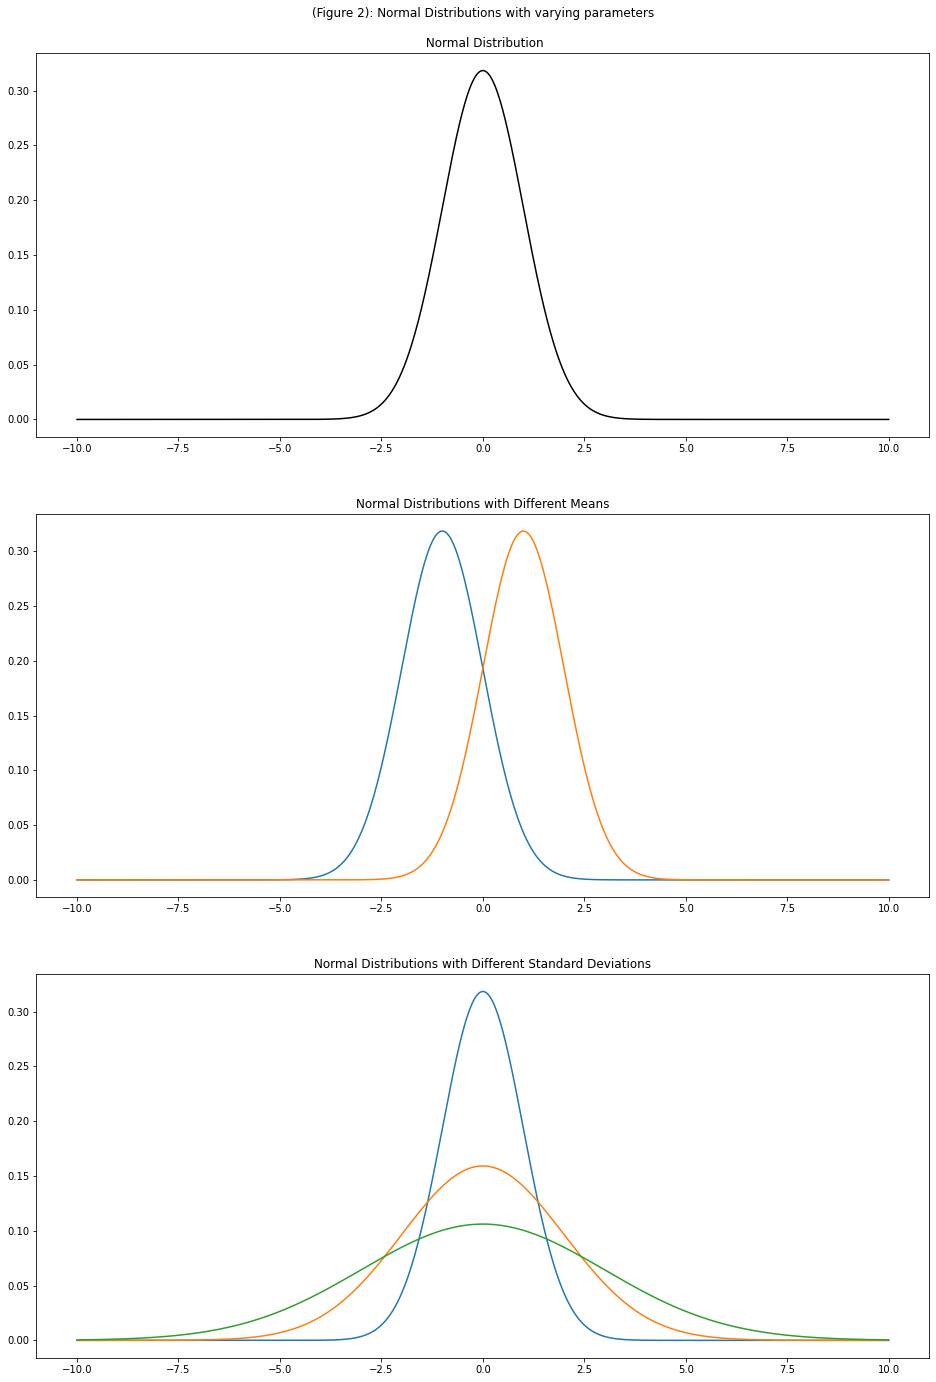

In [28]:
# define normal distribution function
# Optionally, pass different array of x values tp be transformed; default is np.linspace(-5, 5, 1000)
def normal_dist(mean , sd, x = np.linspace(-10, 10, 1000) ):
    prob_density = 1/(np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

# set up plot
fig, axs = plt.subplots(3, 1, figsize=(16, 24))

# perform transformation
normal_dist_list = normal_dist(mean=0, sd=1)
axs[0].plot(x, normal_dist_list, label= "Normal Distribution", c='k')
axs[0].set_title("(Figure 2): Normal Distributions with varying parameters\n\n Normal Distribution")

# plot normal curves with varying means 
for mean in range(-1,3, 2):
    normal_dist_list = normal_dist(mean=mean, sd=1)
    axs[1].plot(x, normal_dist_list, label= "Normal Distribution")
    axs[1].set_title("Normal Distributions with Different Means")
    
# plot normal curves with varying standard deviations 
for sd in range(1,4):
    normal_dist_list = normal_dist(mean=0, sd=sd)
    axs[2].plot(x, normal_dist_list, label= "Normal Distribution")
    axs[2].set_title("Normal Distributions with Different Standard Deviations")

### Standard Normal Distribution

The standardized normal distribution is the most important member of the family of normal probability distributions—the one with $\mu = 0$  and $\sigma = 1$. The normal random variable distributed according to the standard normal distribution is called the standard normal variable and is denoted by $Z$. It represents the number of standard deviations a given point X lies from the mean of the standard normal distribution.  It is expressed as
<h3 align="center">
    <font size="4">
        $ Z =  \frac{X-\mu}{\sigma}$
    </font>
    </h3> 

A key feature of all normal distributions is that, using the equation above, they can be transformed to be analyzed using the standard normal distribution. From the equation above, it follows that for any random variable X, 
<h3 align="center">
    <font size="4">
        $ X =  \mu + (\sigma)Z$
    </font>
    </h3> 
    
This is true for any normally distributed random variable X, when population standard deviation and mean are known.



### Cauchy Distribution

The **Cauchy Distribution** is a fat-tailed distribution, which looks normal, but has incalculable mean and variance. This appears when the possible outcomes of a random variable $X$ are extreme more often than a standard-normal distribution would predict.

For reasons beyond the scope of this book, an equation for a Cauchy distributions's mean or variance does not exist. 

### T-Distribution
#### Sampling Distribution

Let $x_1, ..., x_n$ be the numbers observed in a sample from a continuously distributed population with expected value $\mu$. The sample mean and sample variance are given by: 
<h3 align="center">
    <font size="4">
        $ \bar{x} =  \frac{x_1+...+x_n}{n}$
    </font>
    </h3> 
<h3 align="center">
    <font size="4">
        $ s^2 =  \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})^2$
    </font>
    </h3> 
    
We can obtain a $t$-value: 
<h3 align="center">
    <font size="4">
        $ t =  \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$
    </font>
    </h3> 
    
#### I.I.D. Assumption

The t-distribution with $n-1$ degrees of freedom is the sampling distribution of the t-value when the samples consist of independent identically distributed observations from a normally distributed population. Thus for inference purposes t is a useful "pivotal quantity" in the case when the mean and variance $(\mu ,\sigma ^{2})$ are unknown population parameters, in the sense that the t-value has then a probability distribution that depends on neither $\mu$  nor $\sigma ^{2}$

## <font color="green">IID is very important, especially when we discuss application. The assumption often fails for financial data as the magnitude of price changes on a given day are correlated with the magnitude on the following day - i.e., high and low volatility days tned to cluster.</font>

As special case t-distributions, we can model both the standard normal distribution and Cauchy distributions as t-distributions with degrees of freedom of >30 and 1, respectively. 


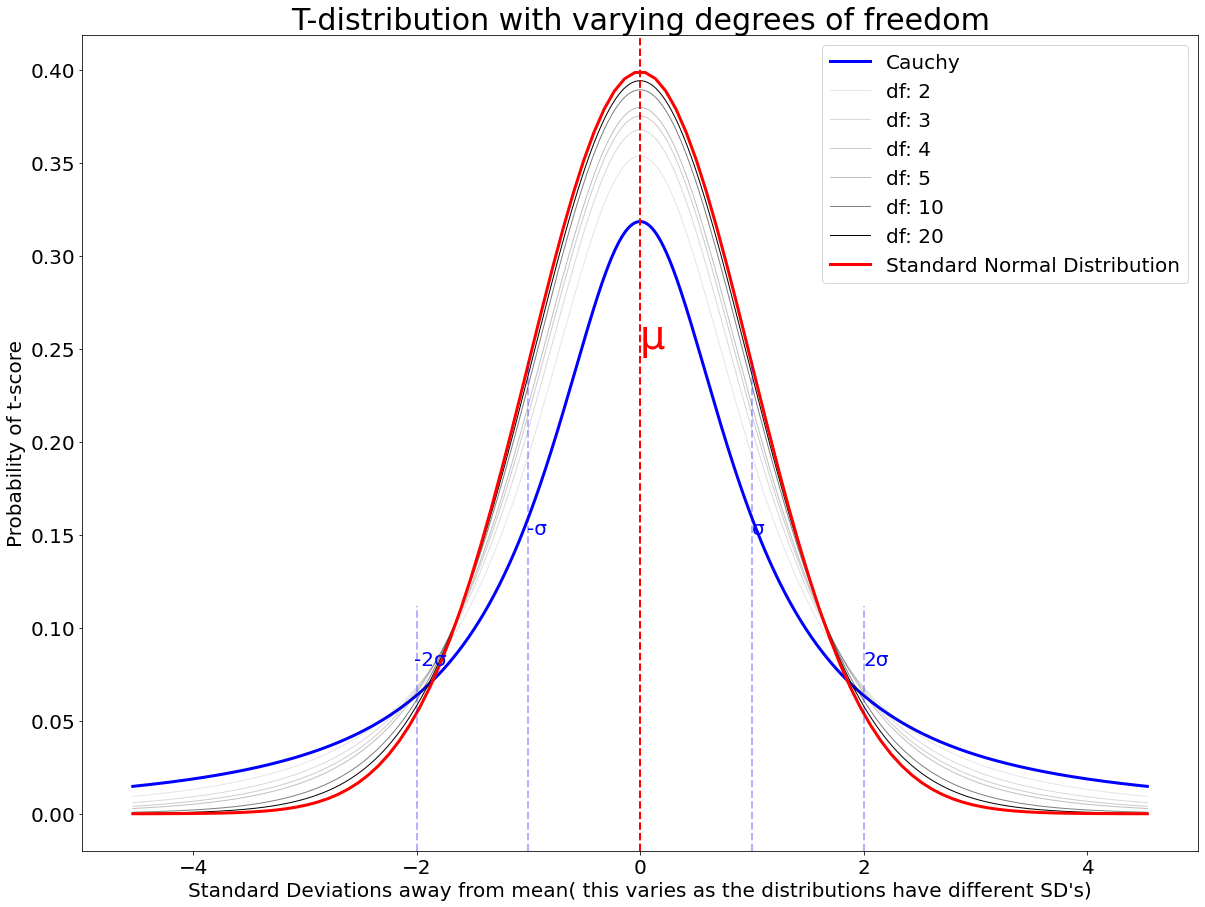

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

plt.rcParams.update({"font.size": 20})

# create plot
fig, ax = plt.subplots(figsize=(20, 15))

# define x as an array using np.linspace and scipy's t.ppf function
x = np.linspace(t.ppf(0.01, 3), t.ppf(0.99, 3), 1000)

# plot cauchy distribution using
ax.plot(x, t.pdf(x, 1), '-', lw=3, alpha=1, label="Cauchy", color='b')

# define list of degrees of freedom you would like to plot
t_df = [2, 3, 4, 5, 10, 20]

# iterate over list and plot normal distribution for each df
for df in t_df:
    x = np.linspace(t.ppf(0.01, 3), t.ppf(0.99, 3), 1000)
    ax.plot(
        x,
        t.pdf(x, df),
        '-',
        lw=1,
        alpha=df / 20,  # alpha will increase as df increases 
        label="df: " + str(df),
        color='k')

# plot standard normal and make color blue
x = np.linspace(t.ppf(0.01, 3), t.ppf(0.99, 3), 100)
ax.plot(x,
        t.pdf(x, 1000),
        lw=3,
        alpha=1,
        color='r',
        label='Standard Normal Distribution')

plt.rcParams.update({"font.size": 15})
ax.set_ylabel("Probability of t-score")
ax.set_xlabel(
    "Standard Deviations away from mean( this varies as the distributions have different SD's)"
)

plt.title("T-distribution with varying degrees of freedom", fontsize=30)

# plot various lines and label them with text to outline where the standard deviatios occur on normal distributions
plt.axvline(x=0, c='r', linestyle='--', lw=2)
plt.axvline(x=1, ymax=.6, c='b', linestyle='--', lw=2, alpha=.3)
plt.axvline(x=-1, ymax=.6, c='b', linestyle='--', lw=2, alpha=.3)
plt.axvline(x=2, ymax=.3, c='b', linestyle='--', lw=2, alpha=.3)
plt.axvline(x=-2, ymax=.3, c='b', linestyle='--', lw=2, alpha=.3)
plt.text(-.004, .25, 'μ', c='r', size=40)
plt.text(1 + .001, .15, 'σ', c='b', size=20)
plt.text(-1 - .008, .15, '-σ', c='b', size=20)
plt.text(2 + .001, .08, '2σ', c='b', size=20)
plt.text(-2 - .02, .08, '-2σ', c='b', size=20)
plt.legend(fontsize=20)


Notice the large difference in tail size. More extreme events are much more likely if a random variable follows a Cauchy distribution. 

## Distributions of stock data 
In the domain of stock returns, most stocks will fall somewhere on the continuum between standard normal and the Cauchy distribution. Plotting the returns of a stock can tell you about investor feelings toward the stock, and whether the stock has a distribution closer to that of the Cauchy, with fat tails, or the standard normal with thin tails. Stocks whose returns distribution has fat tails have had more extreme changes, more often. Stocks whose return distribution clusters around its mean have had fewer extreme changes. In fact, in finance, the relative volatility of a stock is referred to as it's _beta_($\beta$). $\beta$ is unique for each security in a portfolio. It is a weight that describes the sensetivity of that security to market changes. $\beta$ is generally found using past market data, where the "market" is the S&P500. In fact, a $\beta$ for a given security $i$ can be found by taking the ratio of the covariance between the returns from that security and the market returns, and the variance of the market returns. This will quantify relative volatility of a security: 
<h3 align="center">
    <font size="5">
        $ \beta_i = \frac{Cov(r_i,r_m)}{Var(r_m)}$
    </font>
</h3>

Without even knowing this equation, we can know whether a stocks returns have been more volatile that that of the market by looking at their return distributions:

For example, we can compare the returns of the S&P500 to the returns of Proctor & Gamble, a historically low-volatility stock, and Tesla, a relatively high-volatility stock. 

In [41]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

pg_data = web.DataReader('PG', 'yahoo', dt.datetime(2010, 1, 1),
                           dt.datetime.today())
tsla_data = web.DataReader('TSLA', 'yahoo', dt.datetime(2010, 1, 1),
                           dt.datetime.today())
pg_returns = pg_data["Adj Close"].pct_change().resample("W").first().dropna()
tsla_returns = tsla_data["Adj Close"].pct_change().resample("W").first().dropna()
market_data = web.DataReader('^GSPC', 'yahoo', dt.datetime(2010, 1, 1),
                             dt.datetime.today()).resample("W").first()
sp500 = market_data["Adj Close"].pct_change()


Calculating the beta values is simple using numpy's covariance and variance functions: 

In [42]:
pg_beta = np.cov(pg_returns, sp500) / np.var(sp500)
pg_beta[0,0]

0.18875806073864448

In [43]:
tsla_beta = np.cov(tsla_returns, sp500.reindex_like(tsla_returns)) / np.var(sp500)
tsla_beta[0,0]

3.1755363185953343

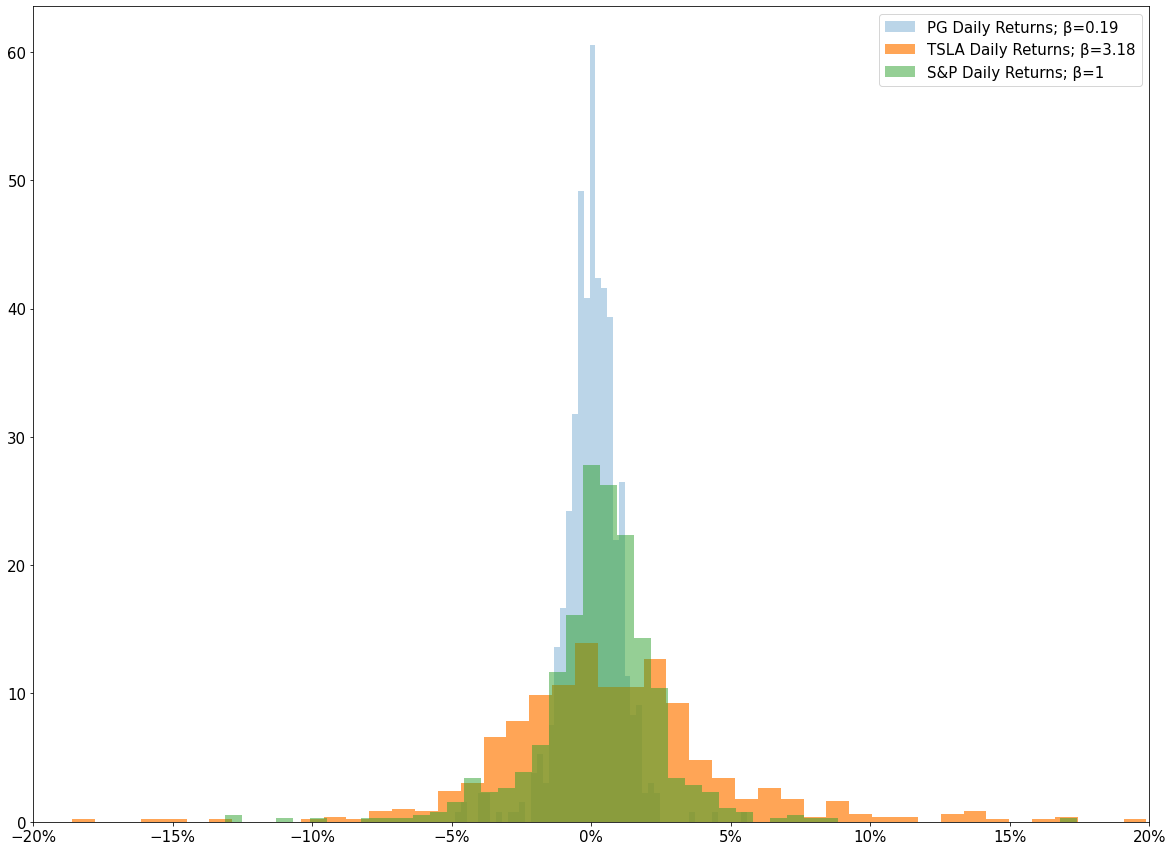

In [44]:
fig, ax = plt.subplots(figsize=(20, 15))
pg_returns.hist(bins=50,
                   label="PG Daily Returns; β="+str(pg_beta[0,0].round(2)),
                   ax=ax,
                   density=True,
                   grid=False,
                   alpha=.3)
tsla_returns.hist(bins=50,
                     label="TSLA Daily Returns; β="+str(tsla_beta[0,0].round(2)),
                     ax=ax,
                     density=True,
                     grid=False,
                     alpha=.7)
sp500.hist(bins=50,
                      label="S&P Daily Returns; β="+str(1),
                      ax=ax,
                      density=True,
                      grid=False,
                      alpha=.5)
#pg_returns_df["Adj Close"].plot.kde(ax=ax,
#                                      label="Standard Normal",
#                                     grid=False,
##                                    c='b',
#                                  linewidth = 5,
#                                 alpha=.7)
#tsla_returns_df["Adj Close"].plot.kde(ax=ax,
#                                      label="Cauchy",
#                                      grid=False,
#                                      linewidth = 5,                                      c='orange',
#                                      alpha=.7)

ax.legend()
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
ax.set_xbound(lower=-.2, upper=.2)

There are more ways to visualize data volatility: 

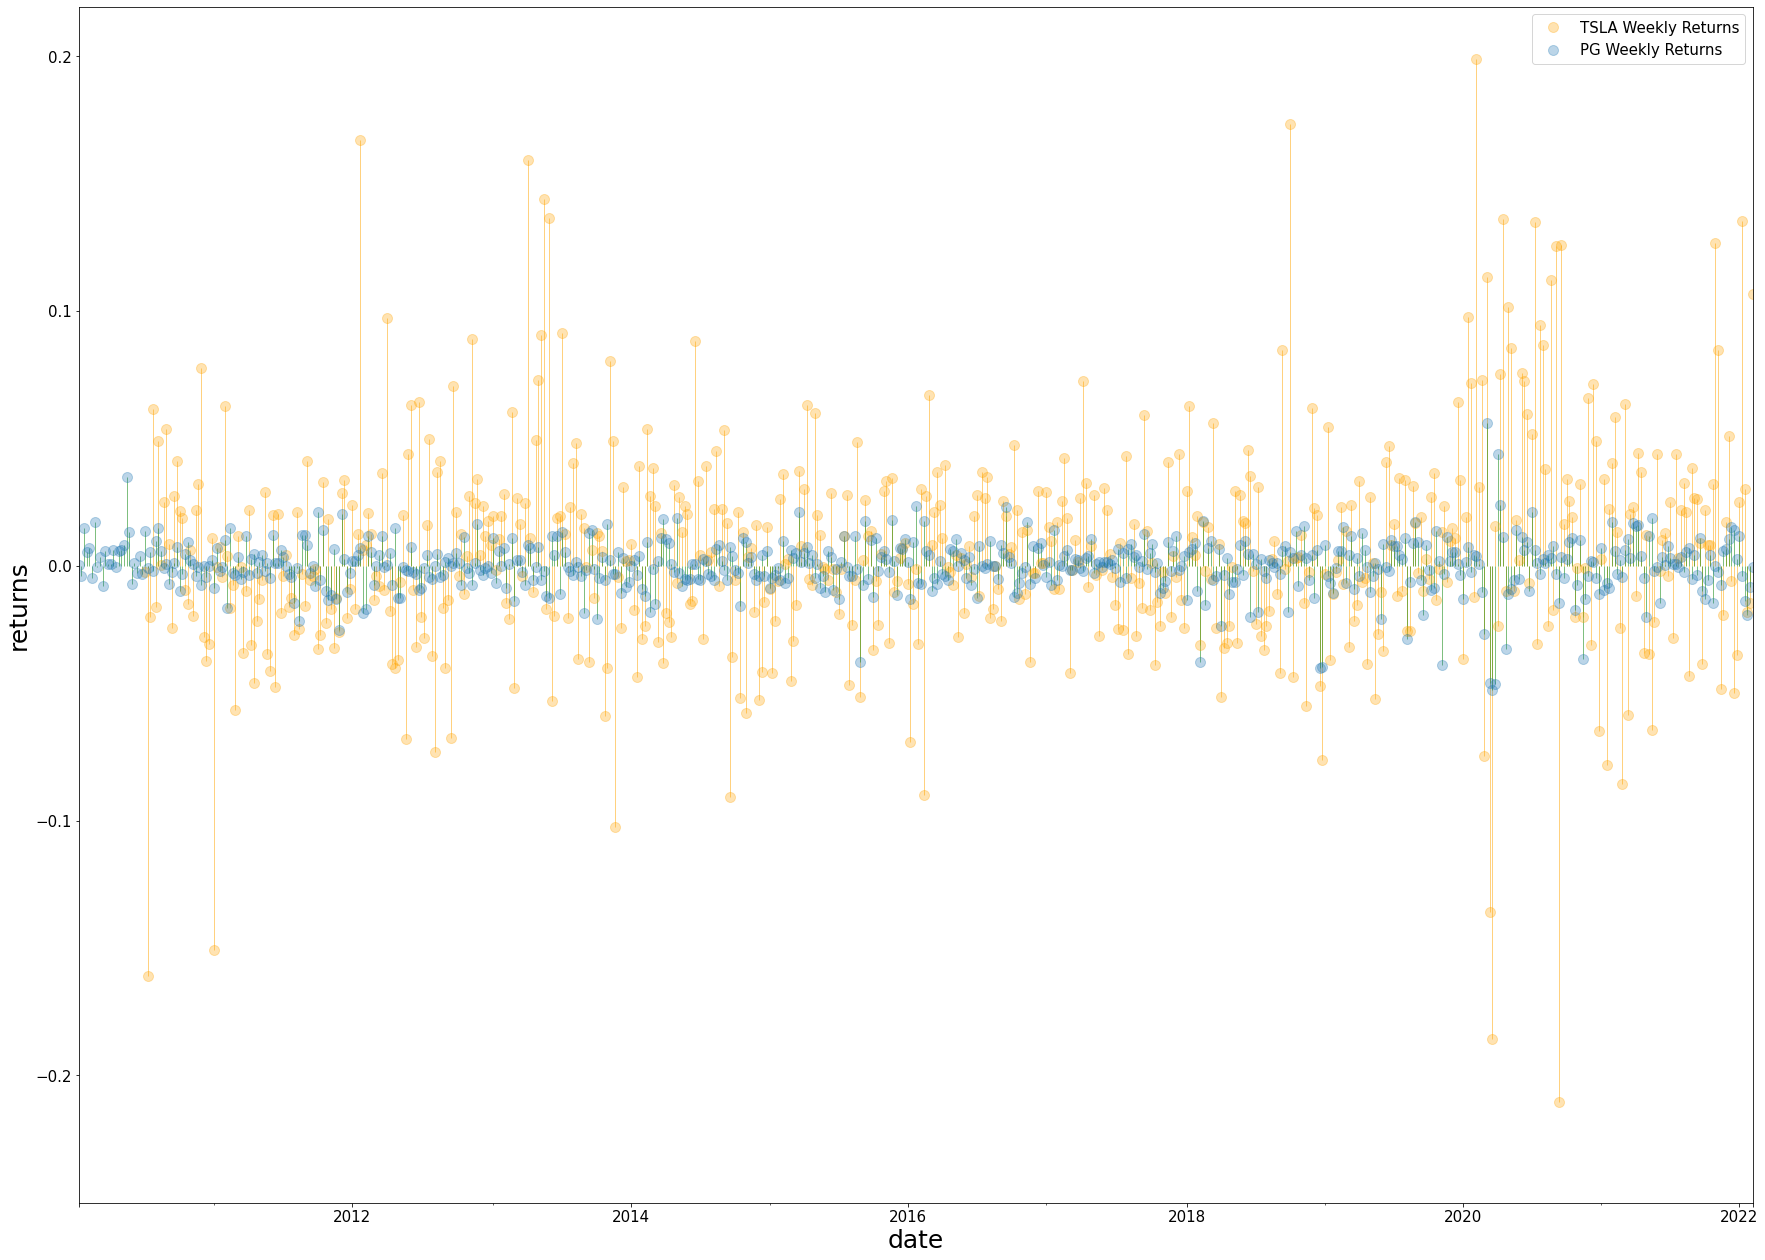

In [45]:
fig, ax = plt.subplots(figsize=(30, 22))

tsla_returns.plot(linestyle='',
                  marker='o',
                  alpha=.3,
                  ms=10,
                  label="TSLA Weekly Returns",
                  c='orange')
ax.vlines(tsla_returns.index, 0, tsla_returns.values, lw=0.5, color='orange')

pg_returns.plot(linestyle='',
                marker='o',
                alpha=0.3,
                ms=10,
                label="PG Weekly Returns",
                c='C0')
ax.vlines(pg_returns.index, 0, pg_returns.values, lw=0.5, color='green')

ax.set_ylabel('returns', fontsize=25)
ax.set_xlabel('date', fontsize=25)

ax.legend()
ax.set_ybound(lower=-.25)

plt.show()

TSLA's returns distribution more closely follows a Cauchy(fat-tailed) distribution and MSFT's returns more closely follow a standard normal distribution. 

What does the distribution of actual stock prices look like? 

## Lognormal Distribution

A random variable $X$ is said to have a lognormal distribution if $Y = ln(X)$ is normally distributed, where $ln$ denotes the natural logarithm.

In other words, $X$ is log-normally distributed if the natural logarithm of $X$ is normally distributed with mean $\mu$  and variance $\sigma ^2$:

$ln(X) = N(\mu, \sigma^2)$

The lognormal distribution is positively skewed with many small values and just a few large values. Consequently, the mean is greater than the mode in most cases.
Since the lognormal distribution is bound by zero on the lower side, it is perfect for modeling asset prices that cannot take negative values. On the other hand, the normal distribution cannot be used for the same purpose because it has a negative side.

When the returns on a stock (continuously compounded) follow a normal distribution(as shown above), the stock prices follow a lognormal distribution. Note that even if returns do not follow a normal distribution, the lognormal distribution is still the most appropriate model for stock prices.

The probability density function of the distribution is:
<h3 align="center">
    <font size="4">
        $f(x) = \frac{1}{x\sigma\sqrt{2\pi}}e^{\frac{- (lnx-\mu)^2}{2\sigma^2}}$
    </font>
    </h3> 


## <font color="green">Can we include a theoretically derived lognormal curve here before the S\&P plot?</font>

<ipython-input-47-1c7c572f4b02>:5: RuntimeWarning: invalid value encountered in log
  density_points = (1 / x*sd*np.sqrt(2*math.pi))*math.e**(-(np.log(x)-mean)**2 / (2*sd**2))


Text(0.5, 1.0, 'Lognormal Distribution with μ = 0 and σ = 1')

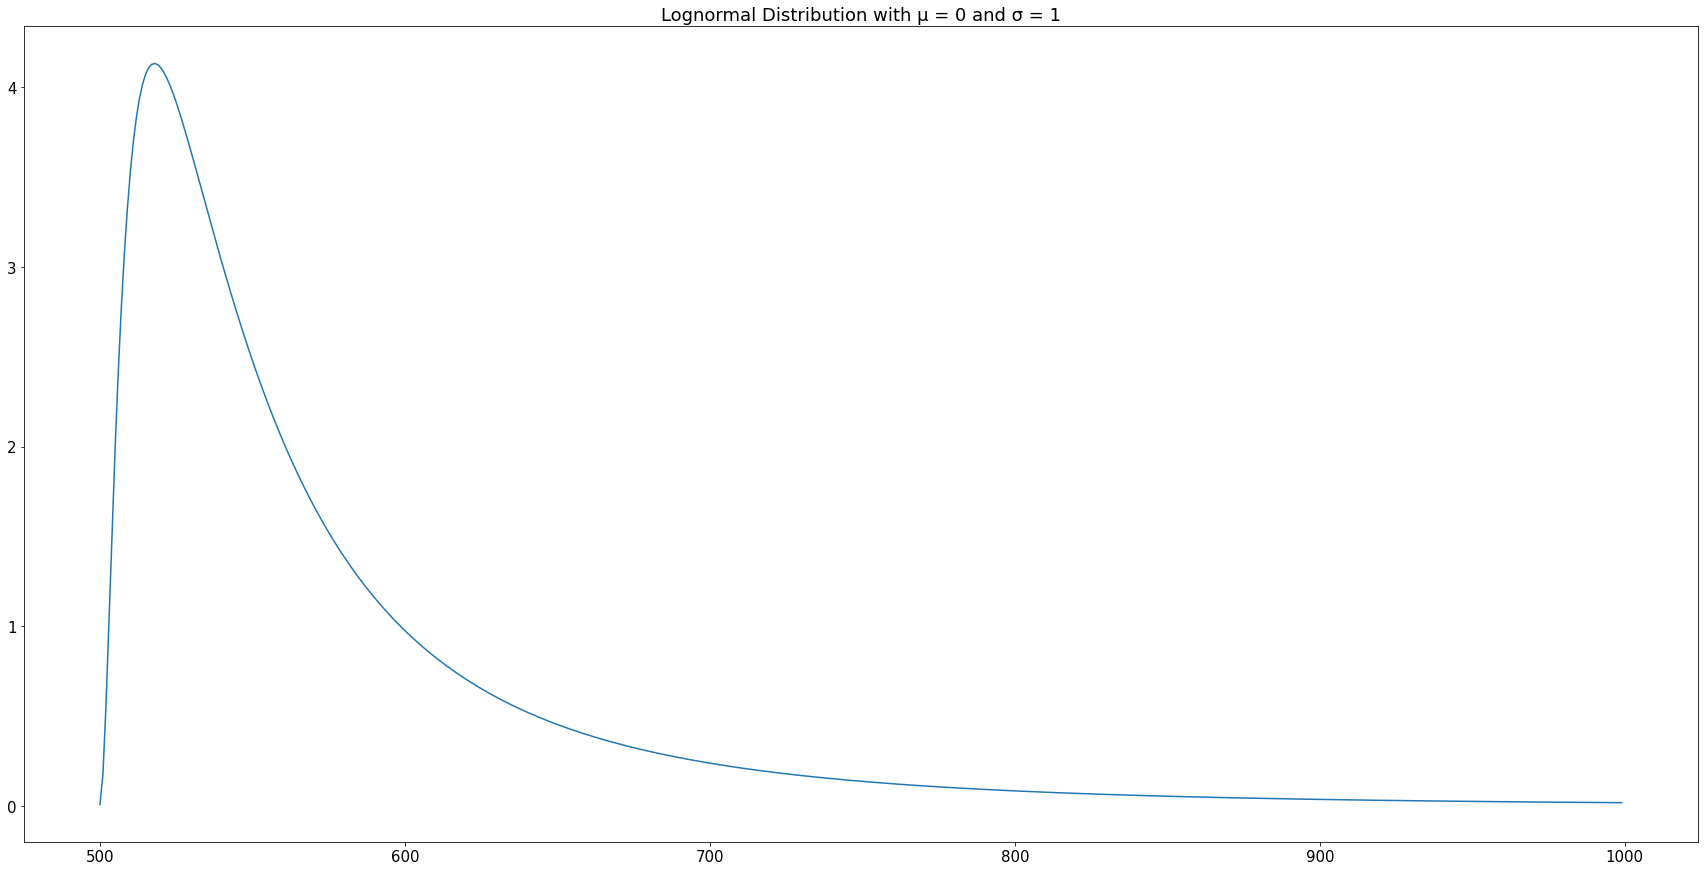

In [47]:
import math

# Optionally, pass different array of x values tp be transformed; default is np.linspace(-5, 5, 1000)
def create_lognormal(mean, sd, x = np.linspace(-10, 10, 1000)):
    density_points = (1 / x*sd*np.sqrt(2*math.pi))*math.e**(-(np.log(x)-mean)**2 / (2*sd**2))
    return density_points

fig, ax = plt.subplots(figsize=(30, 15))
lognorm = create_lognormal(0, 1)
plt.plot(lognorm)
x = np.linspace(0, 10, 1000)
plt.title("Lognormal Distribution with μ = 0 and σ = 1")


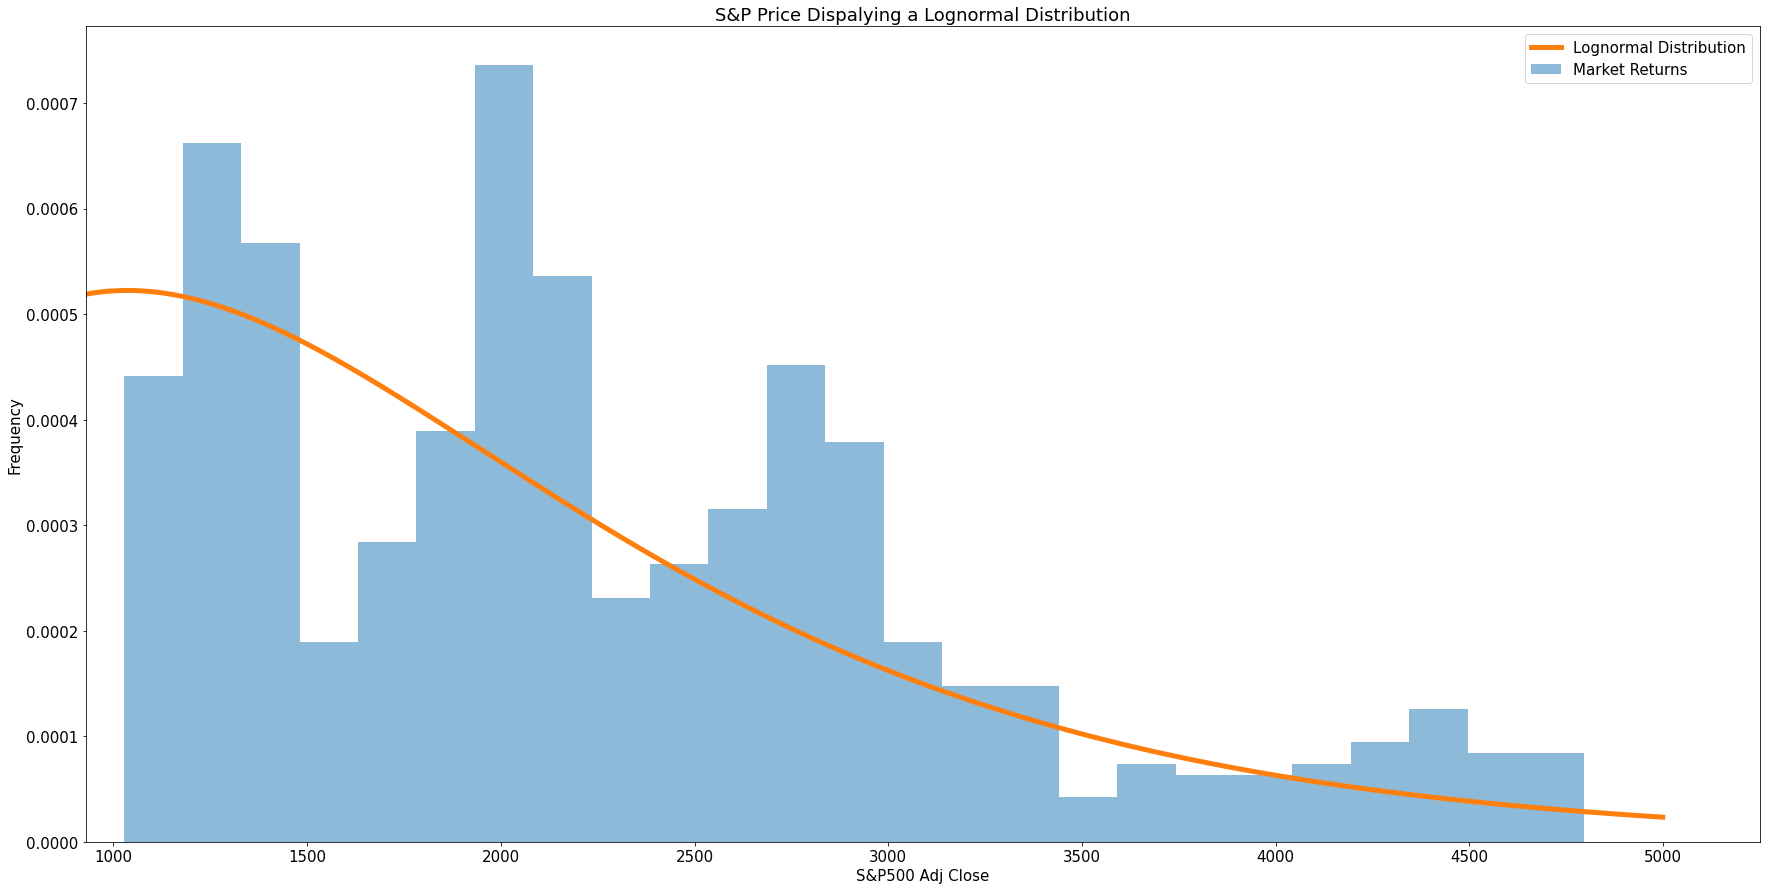

In [48]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(30, 15))
market_data["Adj Close"].plot.hist(bins=25,
                                   label="Market Returns",
                                   ax=ax,
                                   density=True,
                                   grid=False,
                                   alpha=.5)
lognorm_dist = stats.lognorm(market_data["Adj Close"])
shape, loc, scale = stats.lognorm.fit((market_data["Adj Close"]), floc=1)
x_fit = np.linspace(market_data["Adj Close"].min(),
                    market_data["Adj Close"].max(), 5000)
fit = stats.lognorm.pdf(x_fit, shape, loc=loc, scale=scale)
plt.plot(fit, alpha=1, lw=5, label="Lognormal Distribution")
plt.title("S&P Price Dispalying a Lognormal Distribution")
ax.set_xlabel("S&P500 Adj Close")
ax.legend()
ax.set_xbound(lower=market_data["Adj Close"].min()-100)

The distribution is far from perfectly lognormal. But it roughly follows our theoretically derived plot shown above. This theme of roughly following a theoretically derived distribution will be common across all naturally gottwn distributions. Rarely will real-life distributions look exactly like the theoretical ones. 

### Binomial Distribution
If $X$ is a random variable that yields the number of successess seen in the trials of a binomial(yes or no) experiment, then we say that $X$ follows a binomial distribution.

We are interested in finding the probability that some particular number of successes is seen in the course of that binomial experiment.

- $n$ = the number of trials
- $x$ = some number of successes, with $0≤x≤n$
- $p$ = the probability of success on any one trial
- $q$ = $1−p$ = the probability of failure on any one trial

A binomial trial can result in a success with probability $p$ and a failure with probability $q = 1−p$. Then the probability distribution of the binomial random variable $X$, the number of successes in $n$ independent trials, is
<h3 align="center">
    <font size="4">
        $b(x; n, p) = {n \choose x}p^xq^{n-x}$
    </font>
    </h3> 

Where  $x = 0, 1, 2,..., n$ and ${n \choose x}=\frac{n!}{x!(n-x)!}$

The most common example is flipping a coin, which can be modeled as $x=$ the number of "heads" or "tails" in $n$ trials. The probability of success and failure is 0.5. 

The mean $\mu$ and standard deviation $\sigma$ for a binomial distribution $b(x; n, p)$ are
- $\mu = np$
- $\sigma = \sqrt{np(1-p)}$

We define and graph the binomial distribution for various x, p, and n values. 

As an example of the binomial distribution, we can think of the top hedge funds in the stock market. If we assume that the markets are efficient and any given mutual fund only has a 50% probability of beating the market in every year, if there is a large $n$, or a large number of firms, many of them will survive for many years, just by chance. This example is demonstrated wonderfully in Burton Malkiel's *A Random Walk Down Wallstreet* in which he describes a coin flipping contest of 1000 people, which guarantees that multiple people will win more than 10 rounds simply by chance, and then become world-renouned as amazing coin-flippers. 

- How many funds will 'beat' an efficient market for more than 10 years if there are 1000 funds to start? We will find the probability of a single fund beating the market for that long and then multiply that by 1000 funds. 

- $ = P(1) = {10 \choose 1}0.5^{1}0.5^{10-1} = 0.0097$, so there is a 0.97% chance of a single fund beating an efficient market for 10 years, and we can reasonably expect that 97 funds will beat the market for 10 years if 100 start, just by chance. 

## <font color="green">Good use of for loops here. I think it is easier to understand with curves for $P(X)=0.5$</font>

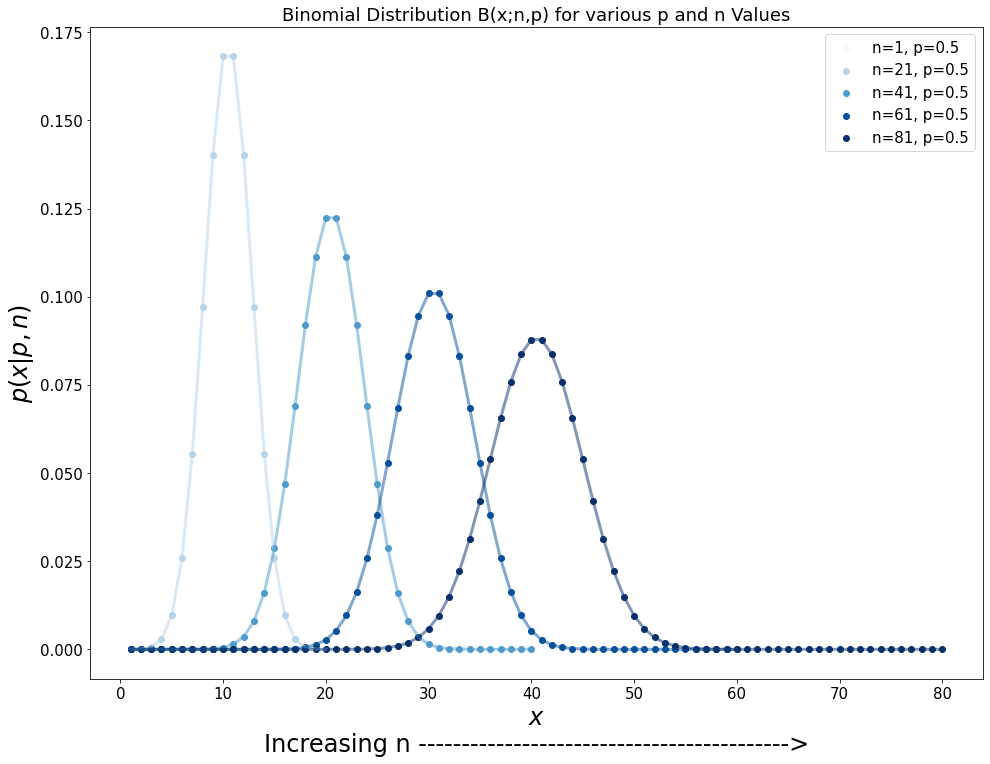

In [49]:
import math
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize


# build binomial function
def binomial(x, n, p):
    return float(math.factorial(n)) / (
        math.factorial(x) * math.factorial(n - x)) * p**x * (1 - p)**(n - x)
binomial(1, 10, 0.5)

fig, ax = plt.subplots(figsize=(16, 12))

cmap = cm.get_cmap('Oranges')
norm = Normalize(vmin=0, vmax=70)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

for p in [.5]:#np.arange(.25, .76, .5):
    if p == .25: cmap = cmap
    else: cmap = cm.get_cmap('Blues')
    for n in range(1, 101, 20):
        binom_vars = [binomial(x, n, p) for x in range(1, n)]
        plt.scatter([x for x in range(1, n)],
                    binom_vars,
                    alpha=1,
                    color=cmap(norm(n)),
                    label=f"n={n}, p={p}")
        plt.plot([x for x in range(1, n)],
                 binom_vars,
                 alpha=.5,
                 linewidth =3,
                 color=cmap(norm(n)))

plt.xlabel("$x$\nIncreasing n ------------------------------------------->",
           fontsize=24)
plt.ylabel("$p(x | p, n)$", fontsize=24)
plt.title("Binomial Distribution B(x;n,p) for various p and n Values")
plt.legend()
plt.show()

In [ ]:
binomial(1, 10, 0.5)

## Poisson Distribution

The Poisson probability distribution applies to many random phenomena occurring during a period of time- for example, the number of faulty products coming off an assembly line in a day or week. It also applies to spatial phenomena such as, for example, the number of typing errors on a page.

A Poisson random variable is a discrete variable that can take on any integer value from zero to infinity. The value gives the number of occurrences of the circumstance of interest during a particular period of time or within a particular spatial area. A unit probability mass is assigned to this sample space. Our concern is then with the probability that there will be, for example, zero, one, two, three, etc., calls to the police during a particular time period on a typical day, or that in typing this chapter I will make zero, one, two, etc. errors on a particular page.

**The Poisson probability function is**

<h3 align="center">
    <font size="4">
        $ P(x) = \frac{\lambda^xe^{-\lambda}}{x!}$
    </font>
    </h3> 
    
where 
- $\lambda$ = the expected mean of x over many trials

- $x$ is the number of occurences that actually happen
      
- $P(X)$ is the probability that x would equal a given x value

The poisson tells us: what is the probability of x occurences happening in a timeframe when the expected number of occurrences is $\lambda$?

For example - what is the probability of 10 people quitting from your company this year when the average has historically been 5?
-  $ P(10) = \frac{5^{10}e^{-5}}{10!} = ~0.018$

- There is a 1.8% chance that 10 or more employees quit this year. 


In [ ]:
((5**10)*math.e**-5) / math.factorial(10)

In [ ]:
import math


# substitute mean for lambda as lambda is a python keyword
def poisson(x, mean):
    p = ((mean**x) * (math.e**-mean)) / math.factorial(x)
    return p


fig, ax = plt.subplots(figsize=(24, 16))
x = 100
for mean in range(5, 100, 20):
    poisson_vars = [poisson(x, mean) for x in range(1, x)]
    xs = np.arange(1, x)
    plt.scatter(xs, poisson_vars, label=f"λ={mean}")
plt.legend()
plt.title("Poisson distribution of various λ for x = 100")
plt.xlabel("# of occurrences for given λ")
plt.ylabel('Probability of coccurence of x for given λ')